In [ ]:
#Necessary imports


In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel("/content/CyberProtection.csv")
df.info()

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head(10)

,Gender,Age,Frequency,Salience,Tolerance,MoodModification,Withdrawl,Relapse,Conflict,Problems,Opinion,Class
0,M,42.0,Rarely,Always,Rarely,Always,Sometimes,Never,Always,Never,Neutral,Y
1,M,42.0,Rarely,Sometimes,Rarely,Always,Sometimes,Never,Always,Never,Neutral,N
2,M,24.0,Always,Often,Sometimes,Always,Rarely,Never,Always,Rarely,Neutral,Y
3,M,23.0,Sometimes,Often,Rarely,Always,Rarely,Never,Always,Sometimes,Negetive,Y
4,M,20.0,Sometimes,Sometimes,Rarely,Sometimes,Never,Never,Always,Sometimes,Neutral,N
5,M,24.0,Always,Always,Always,Sometimes,Sometimes,Rarely,Sometimes,Always,Positive,Y
6,M,22.0,Often,Always,Often,Always,Rarely,Sometimes,Always,Always,Positive,Y
7,M,23.0,Rarely,Sometimes,Always,Rarely,Often,Rarely,Sometimes,Rarely,Neutral,N
8,M,25.0,Often,Always,Always,Rarely,Often,Never,Always,Always,Positive,Y
9,M,21.0,Always,Always,Always,Always,Never,Never,Always,Always,Positive,Y


In [ ]:
df.tail(10)

,Gender,Age,Frequency,Salience,Tolerance,MoodModification,Withdrawl,Relapse,Conflict,Problems,Opinion,Class
283,F,22.0,Rarely,Never,Rarely,Always,Never,Never,Always,Never,Neutral,N
284,M,30.0,Never,Always,Never,Always,Rarely,Never,Rarely,Never,Negetive,N
285,M,21.0,Rarely,Rarely,Always,Always,Always,Sometimes,Always,Sometimes,Positive,Y
286,F,19.0,Rarely,Rarely,Rarely,Always,Rarely,Never,Always,Rarely,Negetive,N
287,M,22.0,Never,Sometimes,Never,Always,Never,Never,Always,Never,Negetive,N
288,M,25.0,Sometimes,Sometimes,Rarely,Always,Sometimes,Never,Always,Never,Negetive,N
289,M,41.0,Never,Never,Never,Always,Never,Never,Always,Never,Negetive,N
290,M,25.0,Often,Often,Always,Always,Sometimes,Never,Always,Sometimes,Neutral,Y
291,M,20.0,Sometimes,Often,Rarely,Always,Rarely,Never,Always,Sometimes,Neutral,Y
292,M,23.0,Sometimes,Rarely,Rarely,Always,Rarely,Never,Always,Rarely,Neutral,N


In [ ]:
# Some statistical info about data
df.describe()

,Age
count,293.000000
mean,23.610922
std,5.139041
min,17.000000
25%,22.000000
50%,23.000000
75%,24.000000
max,78.000000


In [ ]:
#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df['Frequency']= le.fit_transform(df['Frequency'])
df['Salience']= le.fit_transform(df['Salience'])
df['Tolerance']= le.fit_transform(df['Tolerance'])
df['MoodModification']= le.fit_transform(df['MoodModification'])
df['Withdrawl']= le.fit_transform(df['Withdrawl'])
df['Relapse']= le.fit_transform(df['Relapse'])
df['Conflict']= le.fit_transform(df['Conflict'])
df['Problems']= le.fit_transform(df['Problems'])
df['Opinion']= le.fit_transform(df['Opinion'])
df['Class']= le.fit_transform(df['Class'])
df

,Gender,Age,Frequency,Salience,Tolerance,MoodModification,Withdrawl,Relapse,Conflict,Problems,Opinion,Class
0,1,42.0,3,0,3,0,4,1,0,1,1,1
1,1,42.0,3,4,3,0,4,1,0,1,1,0
2,1,24.0,0,2,4,0,3,1,0,2,1,1
3,1,23.0,4,2,3,0,3,1,0,3,0,1
4,1,20.0,4,4,3,2,1,1,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
288,1,25.0,4,4,3,0,4,1,0,1,0,0
289,1,41.0,1,1,1,0,1,1,0,1,0,0
290,1,25.0,2,2,0,0,4,1,0,3,1,1
291,1,20.0,4,2,3,0,3,1,0,3,1,1


In [ ]:
#Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
features=['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']
x=df[features]
y=df.Class

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print('Classification Report:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78        44
           1       0.67      0.87      0.75        30

    accuracy                           0.77        74
   macro avg       0.78      0.79      0.77        74
weighted avg       0.80      0.77      0.77        74

Confusion Matrix:
 [[31 13]
 [ 4 26]]
Accuracy Score: 0.7702702702702703
Precision: 0.6666666666666666
Recall: 0.8666666666666667


In [ ]:
#KNN


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [ ]:
X=df[['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']]
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (234, 11) (234,)
Test set: (59, 11) (59,)


In [ ]:
k_range = range(1, 26)

In [ ]:
# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.6610169491525424, 0.6949152542372882, 0.7288135593220338, 0.6610169491525424, 0.6779661016949152, 0.6440677966101694, 0.6610169491525424, 0.6610169491525424, 0.6779661016949152, 0.6610169491525424, 0.6779661016949152, 0.6779661016949152, 0.6779661016949152, 0.6779661016949152, 0.6779661016949152, 0.6779661016949152, 0.6610169491525424, 0.6779661016949152, 0.6949152542372882, 0.6779661016949152, 0.711864406779661, 0.6779661016949152, 0.6949152542372882, 0.6779661016949152, 0.6949152542372882]


Text(0, 0.5, 'Testing Accuracy')

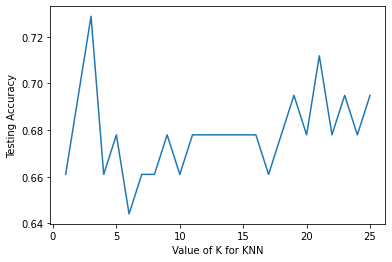

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 7
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [ ]:
predictions = neigh.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        35
           1       0.62      0.42      0.50        24

    accuracy                           0.66        59
   macro avg       0.65      0.62      0.62        59
weighted avg       0.65      0.66      0.64        59

Confusion Matrix:
 [[29  6]
 [14 10]]
Accuracy Score: 0.6610169491525424


In [ ]:
#Decesion Tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
df = pd.read_excel("/content/Dataset (2).xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            293 non-null    object 
 1   Age               293 non-null    float64
 2   Frequency         293 non-null    object 
 3   Salience          293 non-null    object 
 4   Tolerance         293 non-null    object 
 5   MoodModification  293 non-null    object 
 6   Withdrawl         293 non-null    object 
 7   Relapse           293 non-null    object 
 8   Conflict          293 non-null    object 
 9   Problems          293 non-null    object 
 10  Opinion           293 non-null    object 
 11  Class             293 non-null    object 
dtypes: float64(1), object(11)
memory usage: 27.6+ KB


In [ ]:
df

,Gender,Age,Frequency,Salience,Tolerance,MoodModification,Withdrawl,Relapse,Conflict,Problems,Opinion,Class
0,M,42.0,Rarely,Always,Rarely,Always,Sometimes,Never,Always,Never,Neutral,Y
1,M,42.0,Rarely,Sometimes,Rarely,Always,Sometimes,Never,Always,Never,Neutral,N
2,M,24.0,Always,Often,Sometimes,Always,Rarely,Never,Always,Rarely,Neutral,Y
3,M,23.0,Sometimes,Often,Rarely,Always,Rarely,Never,Always,Sometimes,Negetive,Y
4,M,20.0,Sometimes,Sometimes,Rarely,Sometimes,Never,Never,Always,Sometimes,Neutral,N
...,...,...,...,...,...,...,...,...,...,...,...,...
288,M,25.0,Sometimes,Sometimes,Rarely,Always,Sometimes,Never,Always,Never,Negetive,N
289,M,41.0,Never,Never,Never,Always,Never,Never,Always,Never,Negetive,N
290,M,25.0,Often,Often,Always,Always,Sometimes,Never,Always,Sometimes,Neutral,Y
291,M,20.0,Sometimes,Often,Rarely,Always,Rarely,Never,Always,Sometimes,Neutral,Y


In [ ]:
a = {'M': 1, 'F': 0}
df['Gender'] = df['Gender'].map(a)

b = {'Never': 0, 'Rarely': 1,'Sometimes': 2, 'Often': 3,'Always': 4}
df['Frequency'] = df['Frequency'].map(b)

c = {'Never': 0, 'Rarely': 1,'Sometimes': 2, 'Often': 3,'Always': 4}
df['Salience'] = df['Salience'].map(c)

d = {'Never': 0, 'Rarely': 1,'Sometimes': 2, 'Often': 3,'Always': 4}
df['Tolerance'] = df['Tolerance'].map(d)

e = {'Never': 0, 'Rarely': 1,'Sometimes': 2, 'Often': 3,'Always': 4}
df['MoodModification'] = df['MoodModification'].map(e)

f = {'Never': 0, 'Rarely': 1,'Sometimes': 2, 'Often': 3,'Always': 4}
df['Withdrawl'] = df['Withdrawl'].map(f)

g = {'Never': 0, 'Rarely': 1,'Sometimes': 2, 'Often': 3,'Always': 4}
df['Relapse'] = df['Relapse'].map(g)

h = {'Never': 0, 'Rarely': 1,'Sometimes': 2, 'Often': 3,'Always': 4}
df['Conflict'] = df['Conflict'].map(h)

In [ ]:
df

,Gender,Age,Frequency,Salience,Tolerance,MoodModification,Withdrawl,Relapse,Conflict,Problems,Opinion,Class
0,1,42.0,1,4,1,4,2,0,4,Never,Neutral,Y
1,1,42.0,1,2,1,4,2,0,4,Never,Neutral,N
2,1,24.0,4,3,2,4,1,0,4,Rarely,Neutral,Y
3,1,23.0,2,3,1,4,1,0,4,Sometimes,Negetive,Y
4,1,20.0,2,2,1,2,0,0,4,Sometimes,Neutral,N
...,...,...,...,...,...,...,...,...,...,...,...,...
288,1,25.0,2,2,1,4,2,0,4,Never,Negetive,N
289,1,41.0,0,0,0,4,0,0,4,Never,Negetive,N
290,1,25.0,3,3,4,4,2,0,4,Sometimes,Neutral,Y
291,1,20.0,2,3,1,4,1,0,4,Sometimes,Neutral,Y


In [ ]:
features=['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']
x=df[features]
y=df['Class']

In [ ]:
import xgboost as xgb
from sklearn import metrics

In [ ]:
x

,Gender,Age,Frequency,Salience,Tolerance,MoodModification,Withdrawl,Relapse,Conflict,Problems,Opinion
0,1,42.0,1,4,1,4,2,0,4,Never,Neutral
1,1,42.0,1,2,1,4,2,0,4,Never,Neutral
2,1,24.0,4,3,2,4,1,0,4,Rarely,Neutral
3,1,23.0,2,3,1,4,1,0,4,Sometimes,Negetive
4,1,20.0,2,2,1,2,0,0,4,Sometimes,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
288,1,25.0,2,2,1,4,2,0,4,Never,Negetive
289,1,41.0,0,0,0,4,0,0,4,Never,Negetive
290,1,25.0,3,3,4,4,2,0,4,Sometimes,Neutral
291,1,20.0,2,3,1,4,1,0,4,Sometimes,Neutral


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
l = LabelEncoder()
x["Problems"] = l.fit_transform(x["Problems"])
x["Opinion"] = l.fit_transform(x["Opinion"])
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Gender,Age,Frequency,Salience,Tolerance,MoodModification,Withdrawl,Relapse,Conflict,Problems,Opinion
0,1,42.0,1,4,1,4,2,0,4,1,1
1,1,42.0,1,2,1,4,2,0,4,1,1
2,1,24.0,4,3,2,4,1,0,4,2,1
3,1,23.0,2,3,1,4,1,0,4,3,0
4,1,20.0,2,2,1,2,0,0,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...
288,1,25.0,2,2,1,4,2,0,4,1,0
289,1,41.0,0,0,0,4,0,0,4,1,0
290,1,25.0,3,3,4,4,2,0,4,3,1
291,1,20.0,2,3,1,4,1,0,4,3,1


In [ ]:
y

0      Y
1      N
2      Y
3      Y
4      N
      ..
288    N
289    N
290    Y
291    Y
292    N
Name: Class, Length: 293, dtype: object

In [ ]:
y = l.fit_transform(y)
y

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
xg_reg = xgb.XGBRegressor(objective ='reg:linear',gamma=0,colsample_bytree = .5,num_boost_round=100,   learning_rate = 1,scale_pos_weight = 1)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[03:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
accuracy = xg_reg.score(X_test,y_test)
print('Accuracy:',accuracy*100,'%')
print('R2:', r2_score(y_test, preds))

MAE: 0.2891608547356169
MSE: 0.1519391876112947
RMSE: 0.38979377574724655
Accuracy: 38.78468610244018 %
R2: 0.3878468610244018


In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

SVC()

In [ ]:
pred=clf.predict(X_test)
print(classification_report(y_test, pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        32
           1       0.89      0.63      0.74        27

    accuracy                           0.80        59
   macro avg       0.82      0.78      0.79        59
weighted avg       0.82      0.80      0.79        59


Accuracy: 0.7966
[[30  2]
 [10 17]]


In [ ]:
#SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split

In [ ]:
svm_ml = svm.SVC(kernel='linear').fit(X_train, y_train)

cv_svm = cross_validate(svm_ml, X, y, cv=10)
print(cv_svm['test_score'])
print(cv_svm['test_score'].mean())

[0.66666667 0.7        0.83333333 0.86206897 0.75862069 0.82758621
 0.72413793 0.72413793 0.82758621 0.68965517]
0.7613793103448275


In [ ]:
#logistic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import io


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)

predictions = logreg.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[ 0.69252898 -0.00624725  1.04360557  1.76649137  1.70235012  1.43115551
   1.67663456  1.66657529  1.36311217  0.21358594  0.78134031]]
Intercept: [-24.03152146]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.92      0.89      0.91        27

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.92        59

Confusion Matrix:
 [[30  2]
 [ 3 24]]
Accuracy Score: 0.9152542372881356
Precision: 0.9230769230769231
Recall: 0.8888888888888888
